## Background / Motivation


All of the members of our team enjoy watching basketball, and we thought it would be interesting to see if we could predict which players would be All-Stars based purely on their performance statistics. It seemed like it would be an application of what we've been learning in the classroom to a topic that we find exciting.

## Problem statement 
 

While All-Star selections are not a completely perfect judge of the NBA’s best players, having such players on a roster is a necessary prerequisite to winning a championship. Every championship team has had at least one all-star, with 41% of title winners having two all-stars. We aim to investigate how reliable season stats are in predicting future All-Star appearances. All-Star selections are determined by voters who primarily look at stats and we wish to determine their year-to-year carryover.


## Data sources


This data provides the regular season stats (points scored, shots taken, etc) for all NBA players during the 2017-2018 (training) and 2018-2019 seasons (test). Some of the data is cumulative (games and games started) while other columns correspond to per game and season averages. 

Link: https://www.kaggle.com/datasets/abdurahmanmaarouf/nba-players-stats-2016-2017?select=NBA+Players+Stats+201718.csv


## Stakeholders


**NBA Executives:** Having an All-Star is necessary to field a winning team which will in turn create a more profitable franchise. 

**Agents/Players:** Players can use their stats and All-Star status to communicate their value and lobby for higher-paying contracts. Agents in turn will be able to predict which players will or will not be All-Stars and can renegotiate contracts accordingly.

## Data quality check / cleaning / preparation 


In [ ]:
#| echo: false

import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving NBA Players Stats 201718.csv to NBA Players Stats 201718.csv
Saving NBA Players Stats 201819.csv to NBA Players Stats 201819.csv


In [ ]:
#| echo: false


# reading in the data - train and test
nba_2017 = pd.read_csv(io.StringIO(uploaded['NBA Players Stats 201718.csv'].decode('utf-8')))
nba_2018 = pd.read_csv(io.StringIO(uploaded['NBA Players Stats 201819.csv'].decode('utf-8')))


#Train Dataset#

## getting rid of '//' characters in player names
nba_2017['Player'] = nba_2017['Player'].str.split('\\').str[0]

## If players played for more than one team, we want to only keep the row that has their total stats for the year
## applying boolean mask to get of rid of extra rows belonging to players and only keeping their 'TOT' rows
duplicated_players = nba_2017['Player'].duplicated(keep=False)
mask = duplicated_players & (nba_2017['Tm'] == 'TOT')
filtered_df = nba_2017[mask]

## creating seperate subset of players that don't have more than one row
single_team_df = nba_2017[~duplicated_players]

## combining previously created subset with players that played for more than one team and now only have one row assigned to them
nba_2017_2018 = pd.concat([filtered_df, single_team_df])
nba_2017_2018 = nba_2017_2018.reset_index(drop=True)

## filling all N/A values with 0, since we are assuming players have no stats for these data points
nba_2017_2018.fillna(0, inplace=True)

## repeating the process for test dataset
nba_2018['Player'] = nba_2018['Player'].str.split('\\').str[0]
duplicated_players = nba_2018['Player'].duplicated(keep=False)
mask = duplicated_players & (nba_2018['Tm'] == 'TOT')
filtered_df = nba_2018[mask]
single_team_df = nba_2018[~duplicated_players]
nba_2018_2019 = pd.concat([filtered_df, single_team_df])
nba_2018_2019 = nba_2018_2019.reset_index(drop=True)
nba_2018_2019.fillna(0, inplace=True)

## Train dataset

## dropping predictors that won't factor into our analysis, we our focusing on stats
nba_2017_2018 = nba_2017_2018.drop(columns=['Rk','Tm', 'Pos'], axis=1)

## removing players who played less than 20 games
nba_2017_2018 = nba_2017_2018[nba_2017_2018['G'] >= 20]
nba_2017_2018 = nba_2017_2018.reset_index(drop=True)

## converting stats into percentage form
percentage_columns = ['FG%', '3P%', '2P%', 'eFG%', 'FT%']
for col in percentage_columns:
    nba_2017_2018[col] = nba_2017_2018[col] * 100

## creating response variable
## manually creating list of the following year's NBA All-Stars
all_star_list = ['Kemba Walker', 'Kyrie Irving', 'Kawhi Leonard', 'Giannis Antetokounmpo', 
                'Joel Embiid', 'Kyle Lowry', 'Victor Oladipo', 'Khris Middleton', 'Bradley Beal',
                'Ben Simmons', 'Blake Griffin', 'Nikola Vučević', "D'Angelo Russell",
                'Stephen Curry', 'James Harden', 'Kevin Durant', 'Paul George', 'LeBron James',
                'Russell Westbrook', 'Damian Lillard', 'Klay Thompson', 'Anthony Davis', 
                'LaMarcus Aldridge', 'DeMarcus Cousins', 'Nikola Jokić', 'Karl-Anthony Towns']

## assigning a 1 to rows in a new column if the player name is in the list above
nba_2017_2018['AS_NY'] = nba_2017_2018['Player'].apply(lambda x: 1 if x in all_star_list else 0)

## repeating process for test dataset

nba_2018_2019 = nba_2018_2019.drop(columns=['Rk','Tm', 'Pos'], axis=1)
nba_2018_2019 = nba_2018_2019[nba_2018_2019['G'] >= 20]
nba_2018_2019 = nba_2018_2019.reset_index(drop=True)

percentage_columns = ['FG%', '3P%', '2P%', 'eFG%', 'FT%']
for col in percentage_columns:
    nba_2018_2019[col] = nba_2018_2019[col] * 100

all_star_list = ['Kemba Walker', 'Trae Young', 'Giannis Antetokounmpo', 'Pascal Siakam', 'Joel Embiid',
                'Kyle Lowry', 'Ben Simmons', 'Jimmy Butler', 'Khris Middleton', 'Bam Adebayo', 
                'Jayson Tatum', 'Domantas Sabonis', 'James Harden', 'Luka Dončić', 'LeBron James',
                'Kawhi Leonard', 'Anthony Davis', 'Chris Paul', 'Russell Westbrook', 'Damian Lillard', 
                'Donovan Mitchell', 'Brandon Ingram', 'Nikola Jokić', 'Rudy Gobert', 'Devin Booker']
nba_2018_2019['AS_NY'] = nba_2018_2019['Player'].apply(lambda x: 1 if x in all_star_list else 0)

X_train = nba_2017_2018.drop(['Player', 'AS_NY'], axis=1) 
y_train = nba_2017_2018['AS_NY']  

X_test = nba_2018_2019.drop(['Player', 'AS_NY'], axis=1)  
y_test = nba_2018_2019['AS_NY']  

**Reponse Variable Proportions for Train Data**

In [ ]:
#| echo: false

response_counts = nba_2017_2018['AS_NY'].value_counts()
proportions = response_counts / response_counts.sum()

print(proportions)

0    0.939614
1    0.060386
Name: AS_NY, dtype: float64


**Reponse Variable Proportions for Train Data**

In [ ]:
#| echo: false

response_counts = nba_2018_2019['AS_NY'].value_counts()
proportions = response_counts / response_counts.sum()

print(proportions)

0    0.940898
1    0.059102
Name: AS_NY, dtype: float64


We gleaned no major insights from the data cleaning process. We observered that there is a large imbalance in the proportion of 0s and 1s but that is expected because only a select few players get named as an All-Star in a given year. 

The values themselves were correct and clean. The only column that needed cleaning was the `player` column as the original CSV file included "\\" in the player names. Additionally, we removed any players that played less than 20 games. In our inital modeling, some players were captured that had inflated stats due to a limited amount of games played.

In the data preparation process, we dropped every non-statistical predictor (except age) as the stats are what this project is focused on. The hardest step in this process was removing rows for players that played for more than one team. For these players, they had a row of stats consisting for each team they played with as well as a cumulative row that had their overall season statistics. We used a boolean mask to get rid of the individual team rows. The players that played for only one team did not have this issue.

We also manually added our response column (1s for players who appeared in the following year's All-Star game and 0s for those who did not.)

****Tabular Data is located in the appendix****



## Exploratory data analysis

If there is any EDA that helped with model development, put it here. If EDA didn't help then mention that, and you may show your EDA effort *(if any)* in the appendix.

List the insights (as bullet points), if any, you got from EDA  that ended up being useful towards developing your final model. 

If there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

Note that you can write code to publish the results of the code, but hide the code using the yaml setting `#|echo: false`. For example, the code below makes a plot, but the code itself is not published with Quarto in the report.

**VIF Table and Heatmap located in Appendix**



*   The only major insight we gleaned from our EDA process is that multicollinearity is prevalent in the datasets. However, we are using tree-based models so this did not impact model performance. Our conclusions from feature importances are limited however. 




## Approach

We used a variety of different models in our project -- Bagging, Random Forest, AdaBoost, Gradient Boost, and XGBoost. We also used a base logistic regression model as our baseline to compare subsequent model performances. We expected that multicollinearity could be an issue due to the nature of basketball statistics (more shots generally equals more points for example) and thus decided to utilize mostly tree-based models. 

We initially chose to optimize recall, because we wanted to minimize the number of false negatives in our predictions. We felt that this was the most harmful outcome for our stakeholders because it would cause confusion, so we wanted to eliminate as many false negatives as possible. However, we realized that optimizing for ROC-AUC was a more efficient way to do this and also improved our accuracy, so we switched to that instead. 

There were no solutions for our problem that we found on Kaggle. That was part of why we wanted to choose this problem of predicting NBA All-Stars -- it provided an exciting opportunity to work on something that others had not yet already solved. While others have worked on this data, we did not find anybody who manually imported an All-Stars column into the data.

## Developing the model: Hyperparameter tuning

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### Lasso, Ridge & Catboost
*By Sylvia Sherwood*

### Random Forest
*By Izzy Podolsky*

Based on the work with Random Forest models that we did in class, I chose to tune two parameters: max_features and n_estimators. My grid search values for max_features were all odd numbers in the range between 1 and 19, and were 250, 500, and 750 for n_estimators. I used roc_auc and accuracy as my scoring metrics and refit the model to optimize roc_auc. 13 was the optimal value for max_features, while 750 was the optimal value for n_estimators. Because I used numbers in max_features that were close to each other to tune, I decided that a fine gridsearch would not likely yield different results.

I next tuned the decision threshold by plotting accuracy against roc_auc and identified their intersection point, which was 0.09. I set this as the decision threshold when I ran my predictions on the test data.

### Bagged trees 
*By Shray Vaidya*

The initial grid search is as follows:

params = {'base_estimator': [DecisionTreeClassifier(random_state = 1)],
          'n_estimators': [250,300,350,400,450,500,550],
          'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

The optimal hyperparameter values from this search were: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.9, 'max_samples': 0.8, 'n_estimators': 250}. I then tuned the model again with a smaller grid as follows:

params = {'base_estimator': [DecisionTreeClassifier(random_state = 1)],
          'n_estimators': [200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300],
          'max_samples': [0.7, 0.75, 0.8, 0.85, 0.9],
          'max_features': [0.8, 0.85, 0.9, 0.95, 1.0],}

However, I found that the optimal hyperparameters did not change.

### XGBoost
*By Davis Johnson*

In [ ]:
## Initial hyperparameter grid

scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

param_grid = {
    'n_estimators': [35,40,45,50,55,60],
    'max_depth': [3,4,5],
    'learning_rate': [0.01,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'gamma': np.arange(0,21,1),
    'reg_lambda': [30,40,60,80,90,100,150,200],
    'subsample': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'scale_pos_weight': [scale_pos_weight],
    'colsample_bytree': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

## After some modification - final hyperparam grid

scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

param_grid = {
    'n_estimators': [21,22,23,24,25,26,27],
    'max_depth': [4,5,6],
    'learning_rate': [0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'gamma': [0,1,2,3],
    'reg_lambda': [30,40,60,80,90,100,150,200],
    'subsample': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'scale_pos_weight': [scale_pos_weight],
    'colsample_bytree': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

Through use of the optimal hyperparameters and input from the `cv_results` table, I landed on the following model:

In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, max_depth=5, 
                          n_estimators=26, learning_rate=0.1, scale_pos_weight=scale_pos_weight, 
                          subsample=1.0, gamma=0, reg_lambda=40, colsample_bytree=0.3, random_state=1).fit(X_train, y_train)

As shown above - I did some modifications on my initial grid search and alos used the CV results to identify any more optimal combinations. After landing on the above model. I tuned the optimal threshold probability to be equal to **0.28927049** and assessed the model score from there.

## Model Ensemble 

Put the results of enembling individual models. Feel free to add subsections in this section to add more innovative ensembling methods.

### Voting ensemble

The simplest voting ensemble will be the model where all models have equal weights.

You may come up with innovative methods of estimating weights of the individual models, such as based on their cross-val error. Sometimes, these methods may work better than stacking ensembles, as stacking ensembles tend to overfit.

### Stacking ensemble
Try out different models as the metamodel. You may split work as follows. The person who worked on certain types of models *(say AdaBoost and MARS)* also uses those models as a metamodel in the stacking ensemble.

### Ensemble of ensembled models

If you are creating multiple stacking ensembles *(based on different metamodels)*, you may ensemble them.

### Innovative ensembling methods
*(Optional)*

Some models may do better on certain subsets of the predictor space. You may find that out, and given a data point, choose the model(s) that will best predict for that data point. This is similar to the idea of developing a decision tree metamodel. However, decision tree is prone to overfitting.

Another idea may be to correct the individual models with the intercept and slope *(note the tree-based models don't have an intercept and may suffer from a constant bias)*, and then ensemble them. This is equivalent to having a simple linear regression meta-model for each of the individual models, and then ensembling the meta-models with a meta-metamodel or a voting ensemble.

## Limitations of the model with regard to prediction

Though we all comprehensively tuned our models, it is likely that there is more work that could be done. Had we had more time, we could have attempted to tune additional hyperparameters, tuned the ensemble models using a non-greedy approach, or added additional models such as catboost and lightgbm.

The data used in this model is openly accessible to stakeholders through online resources such as websites featuring sports data or media. Because our model uses data from a prior year to make predictions for the next year, it can be utilized as soon as the regular season is over to make predictions for the next year.

This model will not become obsolete unless the way that professional basketball is played radically changes, which is not an event that we can predict but is highly unlikely given modern precedent.



## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? You may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

Add details of each team member's contribution, other than the models contributed, in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Shray Vaidya</td>
    <td>Bagged Trees</td>
    <td></td>    
    <td></td>
  </tr>
  <tr>
    <td>Andy Wen</td>
    <td>AdaBoost, GradBoost</td>
    <td>EDA</td>    
    <td></td>
  </tr>
    <tr>
    <td>Izzy Podolsky</td>
    <td>Random Forest</td>
    <td>Ensembling</td>    
    <td></td>
  </tr>
    <tr>
    <td>Davis Johnson</td>
    <td>XGBoost</td>
    <td>Data Cleaning and Preparation</td>    
    <td>Project Code Template and Report</td> 
  </tr>
</table>

## Appendix {-}

**Distribution of Train Dataset Predictors**

In [ ]:
#| echo: false

from tabulate import tabulate

summary_stats = X_train.describe()

df_summary = pd.DataFrame(summary_stats)

table = tabulate(df_summary, headers='keys', tablefmt='psql')

print(table)


+-------+-----------+----------+----------+-----------+-----------+-----------+-----------+------------+-----------+----------+-----------+----------+-----------+-----------+-----------+-----------+----------+------------+-----------+-----------+-----------+------------+------------+------------+-----------+-----------+
|       |       Age |        G |       GS |        MP |        FG |       FGA |       FG% |         3P |       3PA |      3P% |        2P |      2PA |       2P% |      eFG% |        FT |       FTA |      FT% |        ORB |       DRB |       TRB |       AST |        STL |        BLK |        TOV |        PF |       PTS |
|-------+-----------+----------+----------+-----------+-----------+-----------+-----------+------------+-----------+----------+-----------+----------+-----------+-----------+-----------+-----------+----------+------------+-----------+-----------+-----------+------------+------------+------------+-----------+-----------|
| count | 414       | 414      | 4

**Distribution of Test Dataset Predictors**

In [ ]:
#| echo: false


summary_stats = X_test.describe()

df_summary = pd.DataFrame(summary_stats)

table = tabulate(df_summary, headers='keys', tablefmt='psql')

print(table)


+-------+-----------+----------+----------+----------+-----------+-----------+-----------+------------+-----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+------------+-----------+-----------+-----------+------------+------------+------------+------------+-----------+
|       |       Age |        G |       GS |       MP |        FG |       FGA |       FG% |         3P |       3PA |      3P% |        2P |       2PA |       2P% |      eFG% |        FT |       FTA |      FT% |        ORB |       DRB |       TRB |       AST |        STL |        BLK |        TOV |         PF |       PTS |
|-------+-----------+----------+----------+----------+-----------+-----------+-----------+------------+-----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+------------+-----------+-----------+-----------+------------+------------+------------+------------+-----------|
| count | 423       | 423      

**EDA Heatmap**

<Axes: >

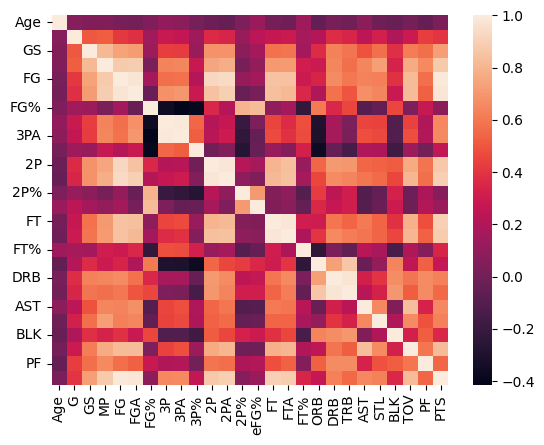

In [ ]:
#| echo: false

import seaborn as sns

x_train_eda = nba_2017_2018.iloc[:, 1:-1]
sns.heatmap(x_train_eda.corr())

**VIF Table from EDA**

In [ ]:
#| echo: false

# Analyzing Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# analyze VIF for training data (2017-2018)
x_train_vif = nba_2017_2018.iloc[:, 1:-1]
X = add_constant(x_train_vif)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

# delete columns with high VIF values 
test_vif = vif_data.sort_values(by = 'VIF', ascending = False) 
test_vif

,feature,VIF
6,FGA,9278.338644
26,PTS,6855.495654
12,2PA,5214.888899
5,FG,4760.500282
20,TRB,2455.633794
9,3PA,2136.962689
11,2P,1669.580429
19,DRB,1382.304451
8,3P,568.795838
15,FT,386.671118
